### =========================== Import Modules =============================

In [1]:
# import python libraries
import sys, os

# Import third party libraries
import pandas as pd

# Dynamically get the current working directory and append 'src' to it
sys.path.append(os.path.join(os.getcwd(), "src"))
from DataPreProcessor import DataPreProcessor as dpp

from utils import train_models as tm
from utils import evaluation as eval
from utils import plot

### ============================= Load Data ===============================

In [2]:
# Creating object for DataPreProcessor Class
obj = dpp(pd.read_csv("heart.csv"), target="diagnosis")

In [3]:
obj.display_all_features()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,diagnosis
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


### =========================== Summary of Data ============================

In [4]:
obj.unique_value_summary()

,Unique Values,Total Values,Percentage (%)
id,920,920,100.000000
age,50,920,5.434783
sex,2,920,0.217391
dataset,4,920,0.434783
cp,4,920,0.434783
trestbps,61,861,7.084785
chol,217,890,24.382022
fbs,2,830,0.240964
restecg,3,918,0.326797
thalch,119,865,13.757225


In [5]:
obj.missing_data_summary()

,Variable,Missing Count,Missing Percentage
0,id,0,0.0%
1,age,0,0.0%
2,sex,0,0.0%
3,dataset,0,0.0%
4,cp,0,0.0%
5,trestbps,59,6.41%
6,chol,30,3.26%
7,fbs,90,9.78%
8,restecg,2,0.22%
9,thalch,55,5.98%


### =========================== Pre-process Data =============================

In [6]:
# Pre-processing dataset initialized in obj
X_train, X_test, y_train, y_test = obj.pre_process()

### ========================== Transformation Logs ===========================

In [7]:
obj.to_numeric_log_df   

,Column Name,Original Value,Converted Value,Conversion Type
0,sex,Male,male,str to str
1,sex,Male,male,str to str
2,sex,Male,male,str to str
3,sex,Male,male,str to str
4,sex,Female,female,str to str
...,...,...,...,...
2777,thal,NaN,NaN,float to float
2778,thal,NaN,NaN,float to float
2779,thal,NaN,NaN,float to float
2780,thal,NaN,NaN,float to float


In [8]:
obj.dropped_features_log_df

,Variable,Missing Percentage
0,slope,33.59
1,ca,66.41
2,thal,52.83


In [9]:
obj.dropped_records_log_df 

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,diagnosis
714,715,69,male,switzerland,asymptomatic,NaN,0.0,False,st-t abnormality,NaN,NaN,NaN,1
733,734,63,male,va long beach,non-anginal,NaN,0.0,False,lv hypertrophy,NaN,NaN,NaN,1
743,744,74,male,va long beach,non-anginal,NaN,0.0,False,normal,NaN,NaN,NaN,0
746,747,51,male,va long beach,asymptomatic,NaN,0.0,True,st-t abnormality,NaN,NaN,NaN,1
749,750,55,male,va long beach,non-anginal,NaN,228.0,False,st-t abnormality,NaN,NaN,NaN,1
750,751,54,male,va long beach,asymptomatic,NaN,0.0,False,st-t abnormality,NaN,NaN,NaN,1
756,757,60,male,va long beach,asymptomatic,NaN,281.0,False,st-t abnormality,NaN,NaN,NaN,1
758,759,58,male,va long beach,asymptomatic,NaN,203.0,True,normal,NaN,NaN,NaN,1
764,765,57,male,va long beach,asymptomatic,NaN,277.0,True,st-t abnormality,NaN,NaN,NaN,1
771,772,63,female,va long beach,atypical angina,NaN,0.0,False,normal,NaN,NaN,NaN,0


In [10]:
obj.imputation_log_df      


,Variable,Imputation Method,Significant Difference,Percentage Difference
0,id,None (No Missing Values),0,0.0
1,age,None (No Missing Values),0,0.0
2,trestbps,Mean,0,1.61
3,chol,Median,1,10.98
4,thalch,Mean,0,1.75
5,oldpeak,Median,1,43.1
6,diagnosis,None (No Missing Values),0,0.0
7,fbs,Most Frequent,N/A,N/A
8,restecg,Most Frequent,N/A,N/A
9,exang,Most Frequent,N/A,N/A


In [11]:
obj.encode_log_df          

,Column Name,Original Unique Values,Encoding Method,Encoded Unique Values
0,sex,"[male, female]",Nominal,"[1.0, 0.0]"
1,dataset,"[cleveland, hungary, switzerland, va long beach]",Nominal,"[0.0, 1.0, 2.0, 3.0]"
2,cp,"[typical angina, asymptomatic, non-anginal, at...",Nominal,"[3.0, 0.0, 2.0, 1.0]"
3,fbs,"[True, False]",Nominal,"[1.0, 0.0]"
4,restecg,"[lv hypertrophy, normal, st-t abnormality]",Nominal,"[0.0, 1.0, 2.0]"
5,exang,"[False, True]",Nominal,"[0.0, 1.0]"


In [12]:
obj.transformation_log_df  

,Column Name,Skewness Before,Kurtosis Before,Action Taken,Skewness After,Kurtosis After
0,id,0.072783,-1.119606,Yeo-Johnson Transformation,-0.260257,-0.959040
1,age,-0.173465,-0.393720,Yeo-Johnson Transformation,-0.039004,-0.405200
2,trestbps,0.213951,2.993188,Yeo-Johnson Transformation,0.277478,2.661651
3,chol,-0.636879,0.196727,Yeo-Johnson Transformation,-1.037892,0.089642
4,thalch,-0.211240,-0.476804,Yeo-Johnson Transformation,-0.054580,-0.596636
5,oldpeak,1.053796,1.169938,Log Transformation,0.468229,-1.159658


In [13]:
obj.scale_log_df

,Column Name,Scaling Method,Original Min,Original Max,Scaled Min,Scaled Max
0,id,Standard,-2.174470e+00,1.658970,-2.174470,1.658970
1,age,Standard,-2.498275e+00,2.699519,-2.498275,2.699519
2,dataset,Standard,0.000000e+00,3.000000,-1.051200,1.741251
3,cp,Standard,0.000000e+00,3.000000,-0.811481,2.354026
4,trestbps,Standard,-6.688428e+00,3.605130,-6.688428,3.605130
5,chol,Standard,-1.934231e+00,2.765033,-1.934231,2.765033
6,restecg,Standard,0.000000e+00,2.000000,-1.561561,1.673635
7,thalch,Standard,-2.701016e+00,2.675110,-2.701016,2.675110
8,oldpeak,Standard,1.000000e-09,1.974081,-0.960179,2.859598


### =========================== Train NN Model =============================

In [14]:
model, task_type, history = tm.train_smart_model(X_train, y_train)

🔍 Classification problem detected.


### =========================== Evaluate Model =============================

In [15]:
metric, y_pred = eval.evaluate_model(model, X_test, y_test, task_type)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Accuracy: 83.91%


Plotting Confusion Matrix (Classification)


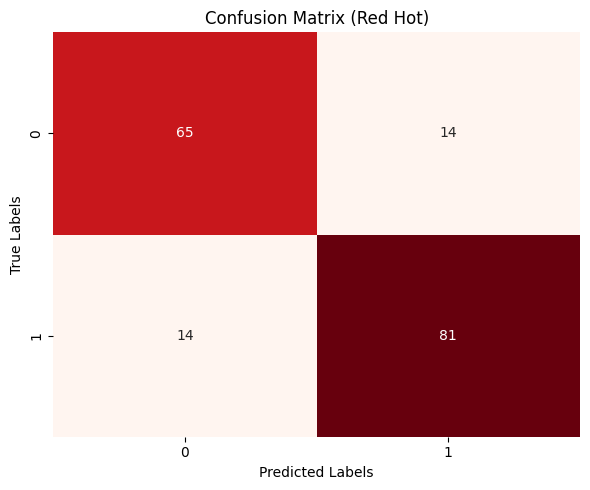

In [16]:
plot.plot_model_outputs(y_test, y_pred)